# Hawley Helmbrecht

## Purpose: To practice the Fourier Transform on images 

*To Do List for future:*
1. Make functions that can do this work
2. Put functions into python files
3. Be able to perform the transform on multiple images at once
4. Be able to do it on a variety of files or get the files into the correct form
5. background removal of the peaks... 
6. applications? 

*To Do List*:

1. Import necessary Packages
2. Import a Tiff image from Mike (currently running them as png)
    * When using numpy the image has to be in grey scale so changing it to grey scale is important
2. Fourier Transform it :) 
3. Get information from that fourier transform :) 

*Warnings: Things to keep in mind*
1. What are the assumptions made during the Fourier Transform?
2. What does the size of my image have to be before the transform? am I getting the same size back if I recreated the image or is something being cut or interpolated? 

*Step 1: Importing necessary packages*

In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy.ndimage import gaussian_filter

*Step 2: Import Image*

In [2]:
#Opens the image and saves as a variable the convert ('L') allows us to convert to greyscale
im =  Image.open("/Users/HawleyHelm/Desktop/P35_LPS_ipsi_40x_zstack_cells_MaxIP.png").convert('L')

*Step 2b: Checking that the image has been imported into the jupyter notebook*

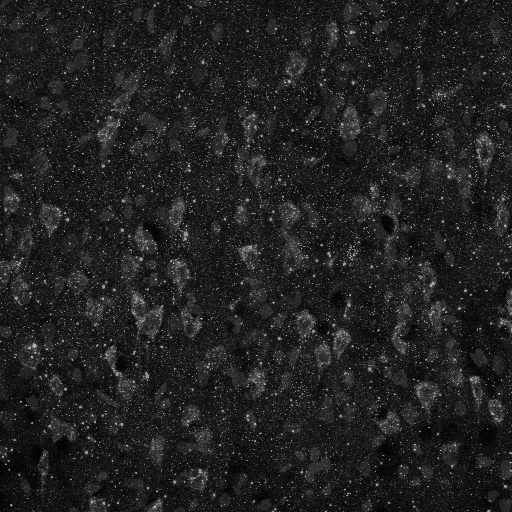

In [3]:
im

*Step 3: Fourier Transform*

* Remember that this is code from stack overflow so don't use this and claim as own* : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

*From here: I think that I need to remove peaks? those are all the blips that show up?*

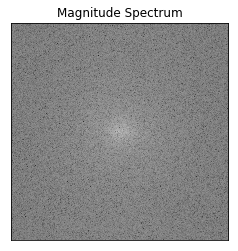

In [4]:
#this is just using the two dimensional fourier transform from numpy
f = np.fft.fft2(im)

fshift = np.fft.fftshift(f)
#What dos this step of this guys code do? 
magnitude_spectrum = np.log(np.abs(fshift))

#This is imply plotting our new image
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

*Step 4: Trying to get a histogram from the magnitude spectrum*

(array([4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+01, 1.6000e+01,
        2.2000e+01, 3.8000e+01, 7.0000e+01, 1.4600e+02, 1.9600e+02,
        3.7000e+02, 6.9400e+02, 1.2200e+03, 1.9880e+03, 3.7350e+03,
        6.2880e+03, 1.0770e+04, 1.7980e+04, 2.8044e+04, 4.0279e+04,
        4.8320e+04, 4.5904e+04, 3.1427e+04, 1.4996e+04, 5.4900e+03,
        2.0320e+03, 9.5800e+02, 6.0000e+02, 3.0600e+02, 1.5200e+02,
        4.8000e+01, 2.4000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.64302811,  1.92988676,  2.21674541,  2.50360405,  2.7904627 ,
         3.07732134,  3.36417999,  3.65103864,  3.93789728,  4.22475593,
         4.51161458,  4.79847322,  5.08533187,  5.37219051,  5.65904916,
         5.94590781,  6.23276645,  6.5196251 ,  6.80648375,  7.09334239,
         7.38020104,  7.66

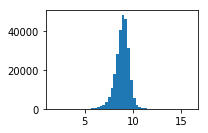

In [5]:
plt.subplot(221)
plt.hist(magnitude_spectrum.ravel(), bins=50)

In [6]:
#plt.subplot(221)
#plt.hist(im, bins=32)

## So it works in greyscale but can we apply it to colors? and get different frequencies to separate protein from cells

*Step 1: Importing the image and saving it as a variable without converting to greyscale*

In [7]:
im_color =  Image.open("/Users/HawleyHelm/Desktop/P35_LPS_ipsi_40x_zstack_cells_MaxIP.png")

*Step 2: Checking the uploaded image*

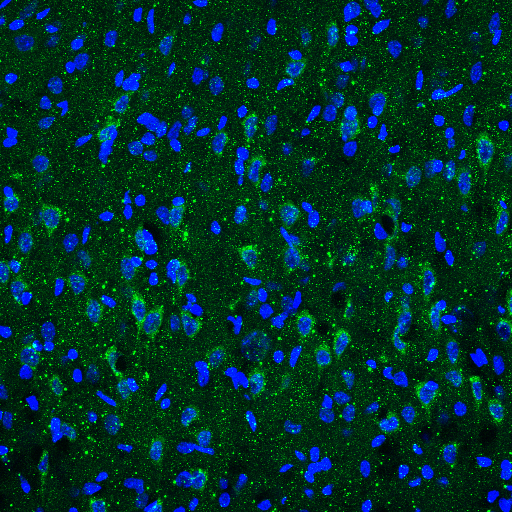

In [8]:
im_color

*Step 3: Splitting the channels into R, G, B Values*

In [9]:
r,g,b = im_color.split()

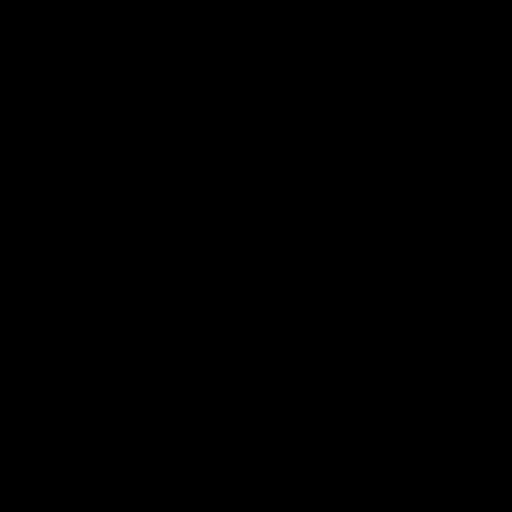

In [10]:
r

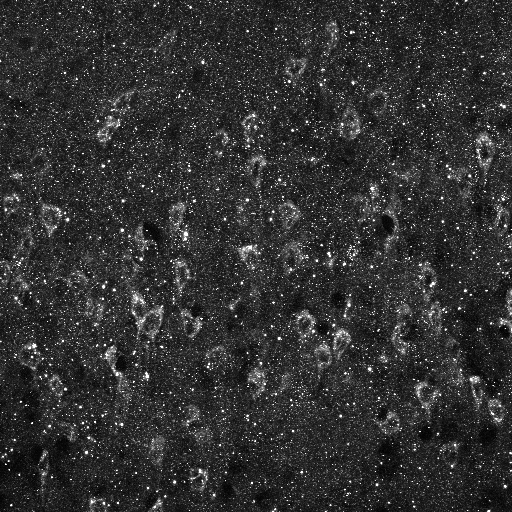

In [11]:
g

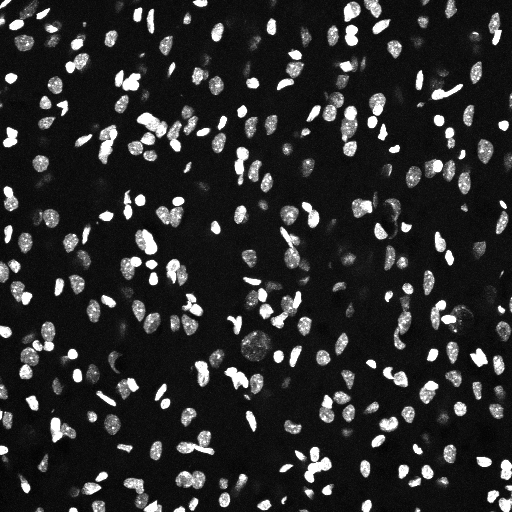

In [12]:
b

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/anaconda3/lib/python3.7/site-pa

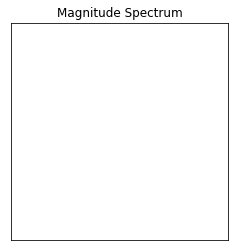

In [13]:
f_red = np.fft.fft2(r)
fshift_red = np.fft.fftshift(f_red)
m_spec_red = np.log(np.abs(fshift_red))

plt.imshow(m_spec_red, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

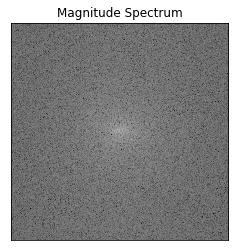

In [14]:
f_green = np.fft.fft2(g)
fshift_green = np.fft.fftshift(f_green)
m_spec_green = np.log(np.abs(fshift_green))

plt.imshow(m_spec_green, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

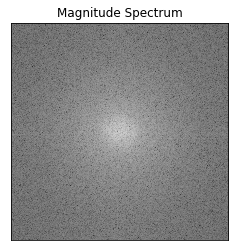

In [15]:
f_blue = np.fft.fft2(b)
fshift_blue = np.fft.fftshift(f_blue)
m_spec_blue = np.log(np.abs(fshift_blue))

magspec = plt.imshow(m_spec_blue, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## So it works but can we increase contrast to see if there is patterning?

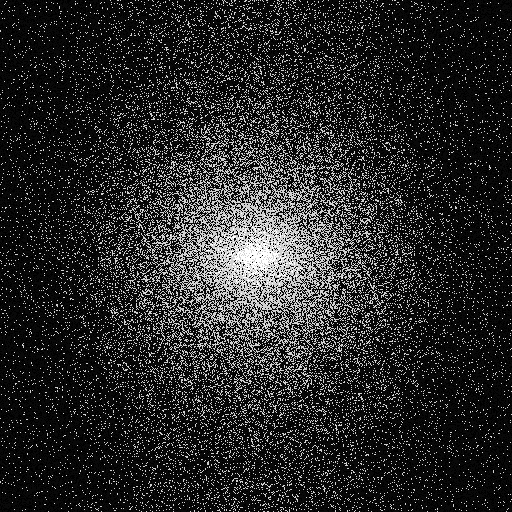

In [16]:
img = Image.fromarray(m_spec_green)
img = img.convert("L")
enhancer = ImageEnhance.Contrast(img)
enhanced_im_green = enhancer.enhance(200.0)
enhanced_im_green

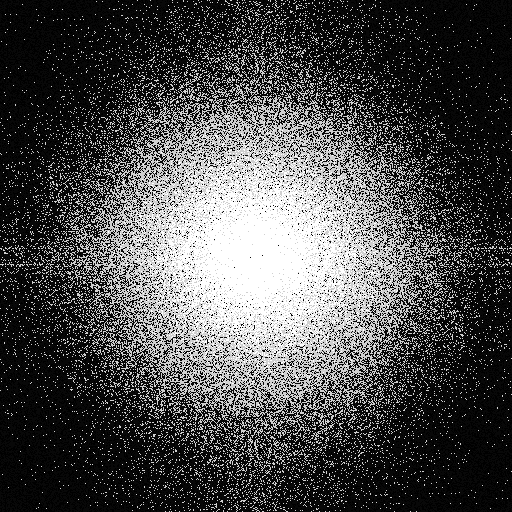

In [17]:
img = Image.fromarray(m_spec_blue)
img = img.convert("L")
enhancer = ImageEnhance.Contrast(img)
enhanced_im_blue = enhancer.enhance(200.0)
enhanced_im_blue

# Applying Gaussian blur to these protein images and then obtaining histograms

In [18]:
arr = np.array(enhanced_im_green)
gauss5 = gaussian_filter(arr, sigma=5)
gauss3 = gaussian_filter(arr, sigma=3)
gauss1 = gaussian_filter(arr, sigma=1)

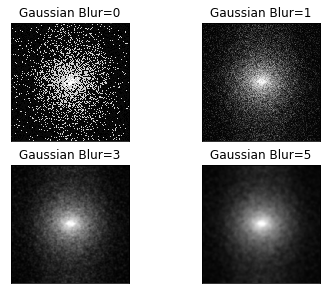

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.imshow(arr, cmap='gray')
ax1.set_title('Gaussian Blur=0')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(gauss1, cmap='gray')
ax2.set_title('Gaussian Blur=1')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])

ax3.imshow(gauss3, cmap='gray')
ax3.set_title('Gaussian Blur=3')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_xticks([])
ax3.set_yticks([])

ax4.imshow(gauss5, cmap='gray')
ax4.set_title('Gaussian Blur=5')
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_xticks([])
ax4.set_yticks([])

fig.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

## Creating Histograms of the data

__3 Bins__

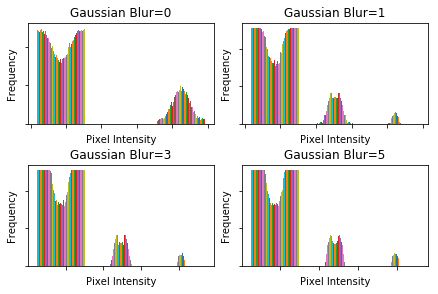

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr, bins=3)
ax1.set_title('Gaussian Blur=0')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Pixel Intensity')

ax2.hist(gauss1, bins=3)
ax2.set_title('Gaussian Blur=1')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Pixel Intensity')

ax3.hist(gauss3, bins=3)
ax3.set_title('Gaussian Blur=3')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Pixel Intensity')

ax4.hist(gauss5, bins=3)
ax4.set_title('Gaussian Blur=5')
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Pixel Intensity')

fig.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

__5 Bins__

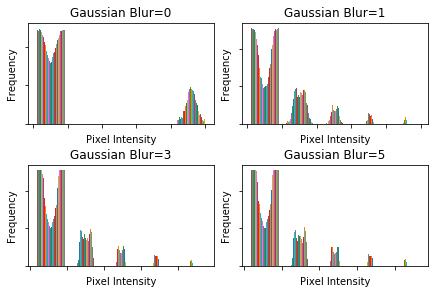

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr, bins=5)
ax1.set_title('Gaussian Blur=0')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Pixel Intensity')

ax2.hist(gauss1, bins=5)
ax2.set_title('Gaussian Blur=1')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Pixel Intensity')

ax3.hist(gauss3, bins=5)
ax3.set_title('Gaussian Blur=3')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Pixel Intensity')

ax4.hist(gauss5, bins=5)
ax4.set_title('Gaussian Blur=5')
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Pixel Intensity')

fig.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

__7 Bins__

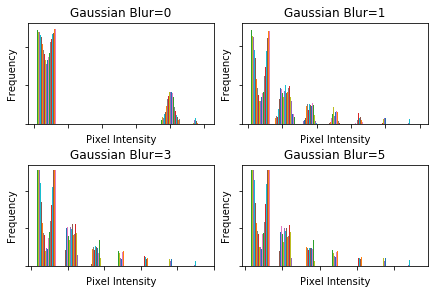

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr, bins=7)
ax1.set_title('Gaussian Blur=0')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Pixel Intensity')

ax2.hist(gauss1, bins=7)
ax2.set_title('Gaussian Blur=1')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Pixel Intensity')

ax3.hist(gauss3, bins=7)
ax3.set_title('Gaussian Blur=3')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Pixel Intensity')

ax4.hist(gauss5, bins=7)
ax4.set_title('Gaussian Blur=5')
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Pixel Intensity')

fig.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

## applying to the cell images

In [23]:
arr1 = np.array(enhanced_im_blue)
gauss5 = gaussian_filter(arr1, sigma=5)
gauss3 = gaussian_filter(arr1, sigma=3)
gauss1 = gaussian_filter(arr1, sigma=1)

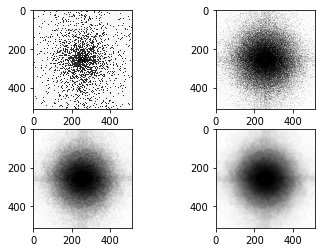

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.imshow(arr, cmap='binary')
ax2.imshow(gauss1, cmap='binary')
ax3.imshow(gauss3, cmap='binary')
ax4.imshow(gauss5, cmap='binary')
plt.show()

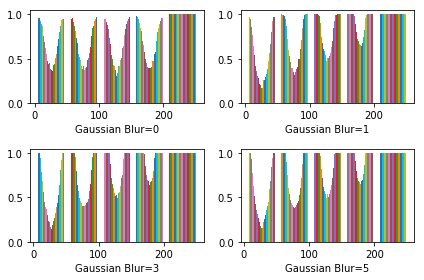

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr1, bins=5, density = True, cumulative = True)
ax1.set_xlabel('Gaussian Blur=0')

ax2.hist(gauss1, bins=5, density = True, cumulative = True)
ax2.set_xlabel('Gaussian Blur=1')

ax3.hist(gauss3, bins=5, density = True, cumulative = True)
ax3.set_xlabel('Gaussian Blur=3')

ax4.hist(gauss5, bins=5, density = True, cumulative = True)
ax4.set_xlabel('Gaussian Blur=5')

fig.tight_layout()

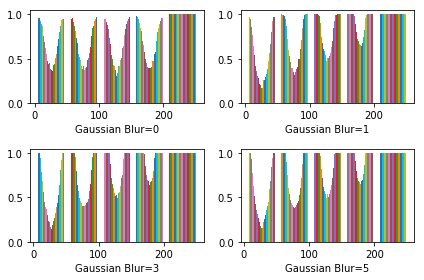

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr1, bins=5, density = True, cumulative = True)
ax1.set_xlabel('Gaussian Blur=0')

ax2.hist(gauss1, bins=5, density = True, cumulative = True)
ax2.set_xlabel('Gaussian Blur=1')

ax3.hist(gauss3, bins=5, density = True, cumulative = True)
ax3.set_xlabel('Gaussian Blur=3')

ax4.hist(gauss5, bins=5, density = True, cumulative = True)
ax4.set_xlabel('Gaussian Blur=5')

fig.tight_layout()

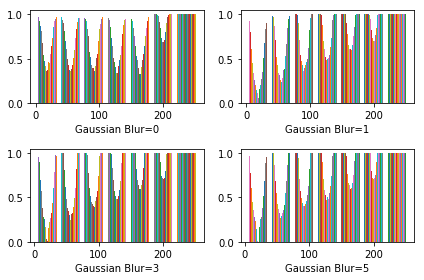

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.hist(arr1, bins=7, density = True, cumulative = True)
ax1.set_xlabel('Gaussian Blur=0')

ax2.hist(gauss1, bins=7, density = True, cumulative = True)
ax2.set_xlabel('Gaussian Blur=1')

ax3.hist(gauss3, bins=7, density = True, cumulative = True)
ax3.set_xlabel('Gaussian Blur=3')

ax4.hist(gauss5, bins=7, density = True, cumulative = True)
ax4.set_xlabel('Gaussian Blur=5')

fig.tight_layout()